In [1]:
from keras.datasets import mnist
import tensorflow as tf
import datetime,os
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

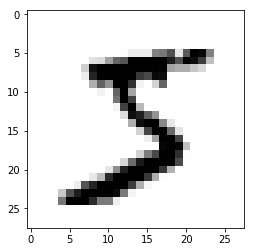

In [6]:
plt.imshow(single_image,cmap='gray_r')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [10]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
single_image.max() #need to be normalized

255

In [12]:
X_train = X_train / X_train.max()

In [13]:
X_test = X_test / X_test.max()

In [14]:
scaled_image = X_train[0]

In [15]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

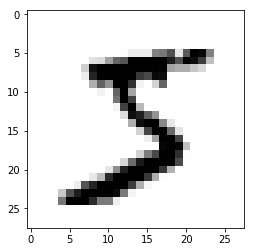

In [16]:
plt.imshow(scaled_image,cmap='gray_r')

In [17]:
X_train.shape # need to include color channel to make newtwork generalized

(60000, 28, 28)

In [18]:
X_train = X_train.reshape(60000,28,28,1)

In [19]:
X_train.shape

(60000, 28, 28, 1)

In [20]:
X_test = X_test.reshape(10000,28,28,1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 32s 529us/step - loss: 0.1357 - acc: 0.9588
Epoch 2/2
60000/60000 [==============================] - 32s 531us/step - loss: 0.0492 - acc: 0.9856


In [25]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 2s 236us/step


[0.05330569984905888, 0.982]

In [26]:
from sklearn.metrics import classification_report

In [27]:
predictions = model.predict_classes(X_test)

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.97      0.99      0.98      1032
          3       0.99      0.99      0.99      1010
          4       1.00      0.97      0.98       982
          5       0.96      0.99      0.98       892
          6       0.99      0.98      0.98       958
          7       0.99      0.98      0.99      1028
          8       0.96      0.98      0.97       974
          9       0.98      0.96      0.97      1009

avg / total       0.98      0.98      0.98     10000

